In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Only 2 classes

data = pd.read_csv('wine_original.csv')
data = data[data['class'] != 3]
labels = data['class']
del data['class']

data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters: ', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Selected Parameters:  {'C': 1, 'penalty': 'l2'}
Training Accuracy = 0.990384615385
Test Accuracy = 0.961538461538


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.4s finished


In [16]:
clf.coef_

array([[-0.51416236, -1.13509305, -0.49750626,  0.40819152,  0.03603117,
         0.01560394, -0.41640802, -0.03336783,  0.13268249, -0.79784703,
         0.14656122, -0.35817307, -0.01796711]])

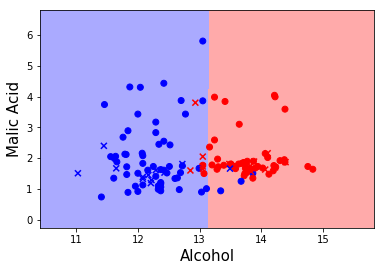

In [19]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


clf = LogisticRegression(C=1000, penalty='l1')
clf.fit(X_train[['Alcohol', 'Malic acid']], y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Malic acid'].min() - 1, X_train['Malic acid'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training & test points
plt.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Malic acid'], c=y_test,marker='x', cmap=cmap_bold)
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Malic Acid', fontsize=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [20]:
clf.coef_

array([[-2.34209657,  0.00831334]])

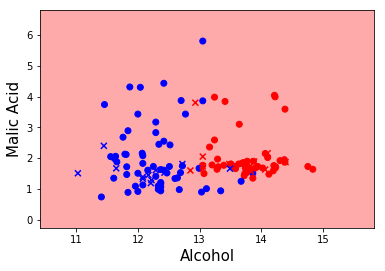

In [21]:
# C = 0.0001

clf = LogisticRegression(C=0.0001, penalty='l1')
clf.fit(X_train[['Alcohol', 'Malic acid']], y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Malic acid'].min() - 1, X_train['Malic acid'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training & test points
plt.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Malic acid'], c=y_test,marker='x', cmap=cmap_bold)
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Malic Acid', fontsize=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [22]:
clf.coef_

array([[ 0.,  0.]])

In [26]:
# No penalty
clf = LogisticRegression(penalty='l1', C=100000000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.961538461538


In [27]:
#original weights
orig_weights = clf.coef_
print ('original weights: ')
print (orig_weights)

original weights: 
[[ -0.30367475  -4.20410138  -7.84949626   1.60037702  -0.04236984
    3.9655297   -2.62337672  16.08247651   3.28314357  -4.00754532
   14.10747532  -3.02606023  -0.04039765]]


In [28]:
# Regularization l1
clf = LogisticRegression(penalty='l1', C=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.923076923077


In [31]:
print ('lasso weights: ')
print (clf.coef_)

lasso weights: 
[[ 0.         -0.840329    0.          0.55639061  0.06968047  0.          0.
   0.          0.         -0.28777984  0.          0.         -0.01872806]]


In [33]:
# Regularization l2
clf = LogisticRegression(penalty='l2', C=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.961538461538


In [34]:
print ('ridge weights: ')
print (clf.coef_)

ridge weights: 
[[  2.36793910e-01  -9.02533908e-01  -3.08314557e-01   5.71540239e-01
    6.02323000e-02   8.58793536e-02  -3.25707472e-01   7.43099039e-04
    3.27724190e-02  -5.31718785e-01   1.80178784e-01  -1.99694522e-01
   -1.84647961e-02]]


In [35]:
# Why l1 gives a sparse weight vector

In [36]:
# Regularization l2, varying C: Low C
clf = LogisticRegression(penalty='l2', C=0.000000001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Test accuracy = 0.5


In [37]:
clf.coef_

array([[  4.26118099e-08,   1.23471152e-08,   9.26941193e-09,
          1.96887864e-07,   3.24211434e-07,   7.68898144e-10,
         -7.67648039e-09,   3.95535063e-09,   4.36390111e-09,
         -3.71078553e-08,   6.11976672e-09,   8.76110388e-09,
         -1.07918296e-05]])

In [60]:
clf = LogisticRegression(penalty='l2', C=0.0001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Test accuracy = 0.769230769231


In [61]:
clf.coef_

array([[  6.02729762e-03,   6.77212617e-04,   1.08793671e-03,
          1.43562281e-02,   3.89448399e-02,   8.55685989e-04,
          4.15047862e-04,   2.77685186e-04,   7.00048232e-04,
          8.47082886e-05,   6.57318366e-04,   1.18797209e-03,
         -5.57986283e-03]])

In [62]:
# Good C
clf = LogisticRegression(penalty='l2', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Test accuracy = 0.961538461538


In [63]:
clf.coef_

array([[ 0.36419119, -1.16231035, -0.56989121,  0.62460879,  0.05731718,
         0.15926463, -0.43103006, -0.01097917,  0.15063666, -0.70851082,
         0.27176725, -0.29676629, -0.01922753]])

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


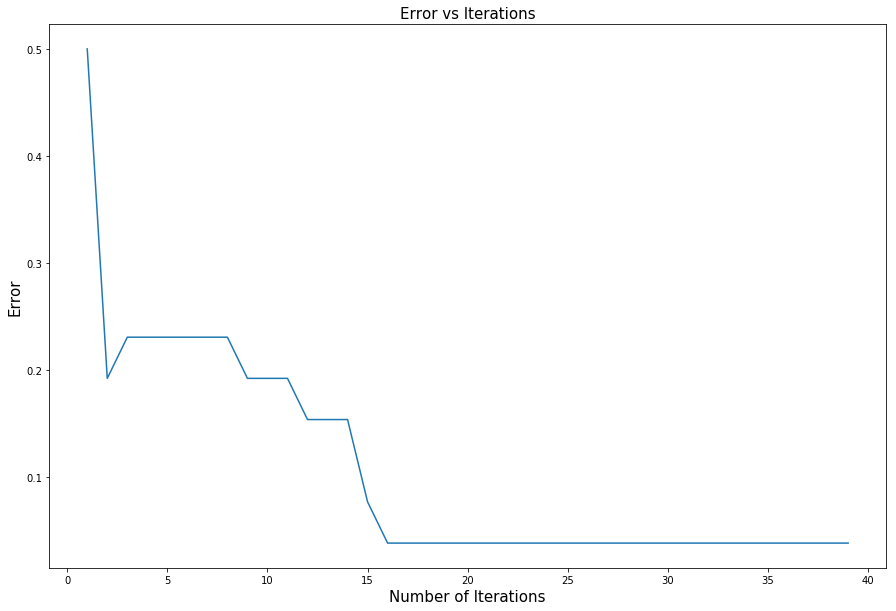

In [64]:
# Effect of number of iterations on accuracy
result=[]
for iter_cnt in range(1, 40):
    clf = LogisticRegression(penalty='l2', solver= 'newton-cg', max_iter=iter_cnt)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    result.append(1-np.sum(y_pred == y_test)/len(y_test))

# Plot
plt.figure(figsize=(15,10))
plt.title('Error vs Iterations', fontsize=15)
plt.xlabel('Number of Iterations', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(range(1, 40), result)
plt.show()

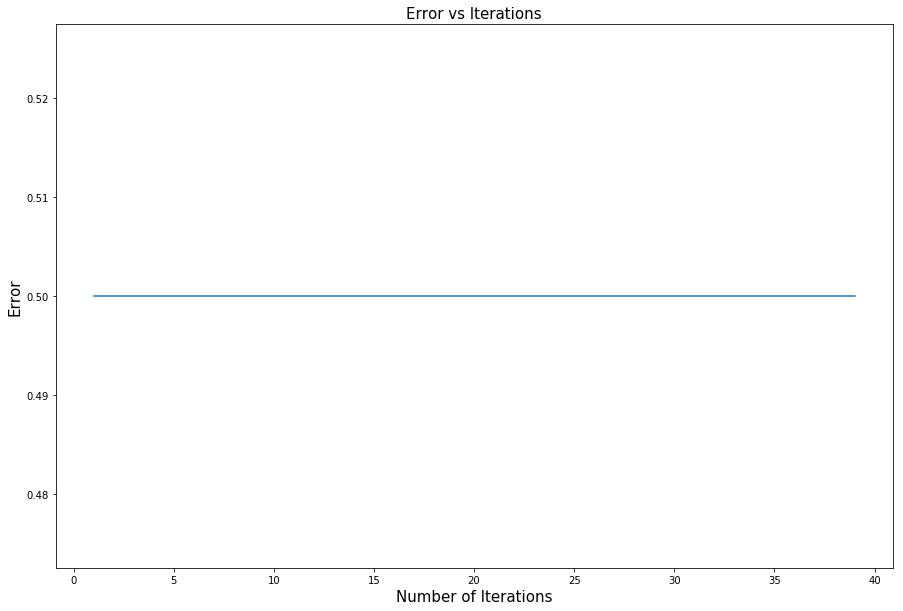

In [65]:
# Gradient Descent
from sklearn.linear_model import SGDClassifier

result = []

# small learning rate
for iter_cnt in range(1, 40):
    clf = SGDClassifier(loss='log', penalty='l2', alpha=0.001, learning_rate='constant', eta0=0.00000001, verbose=0, random_state=7, n_iter=iter_cnt)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    result.append(1-np.sum(y_pred == y_test)*1.0/len(y_test))
#     print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))


# Plot
plt.figure(figsize=(15,10))
plt.title('Error vs Iterations', fontsize=15)
plt.xlabel('Number of Iterations', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(range(1, 40), result)
plt.show()

In [66]:
clf.coef_

array([[  6.63619529e-05,   1.21501648e-05,   1.25257776e-05,
          1.44519431e-04,   5.12249182e-04,   1.02226898e-05,
          7.00692823e-06,   2.73761997e-06,   8.47935985e-06,
          3.41177737e-06,   6.37687978e-06,   1.45687726e-05,
         -6.32884816e-04]])

In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

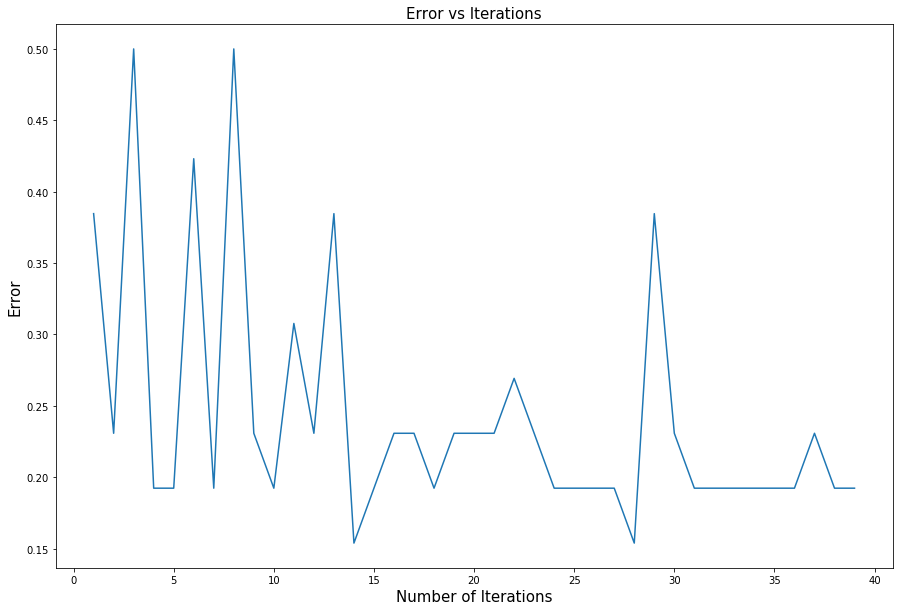

In [68]:
# good learning rate

result = []

for iter_cnt in range(1, 40):
    clf = SGDClassifier(loss='log', penalty='l2', alpha=0.001, learning_rate='constant', eta0=0.01, verbose=0, random_state=7, n_iter=iter_cnt)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    result.append(1-np.sum(y_pred == y_test)/len(y_test))
#     print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))


# Plot
plt.figure(figsize=(15,10))
plt.title('Error vs Iterations', fontsize=15)
plt.xlabel('Number of Iterations', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(range(1, 40), result)
plt.show()

In [69]:
clf.coef_

array([[  18.039544  ,    1.2332193 ,    3.24239914,   45.69909329,
         114.19219978,    2.45002749,    0.76441001,    0.88880591,
           2.04490089,   -0.94186007,    2.10015376,    3.50879068,
         -23.1637711 ]])

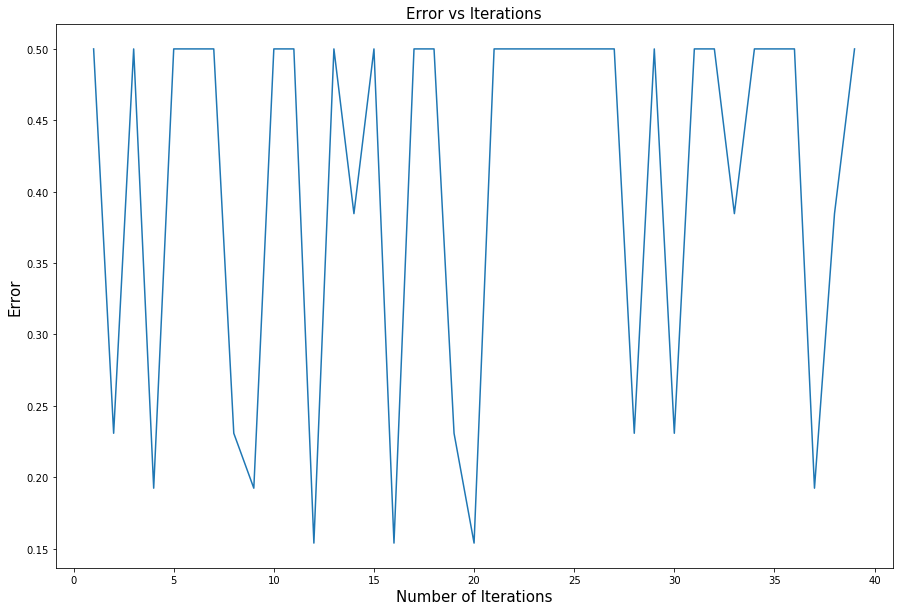

In [32]:
# high learning rate

result = []

for iter_cnt in range(1, 40):
    clf = SGDClassifier(loss='log', penalty='l2', alpha=0.001, learning_rate='constant', eta0=10, verbose=0, random_state=7, n_iter=iter_cnt)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    result.append(1-np.sum(y_pred == y_test)/len(y_test))
#     print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))


# Plot
plt.figure(figsize=(15,10))
plt.title('Error vs Iterations', fontsize=15)
plt.xlabel('Number of Iterations', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(range(1, 40), result)
plt.show()

In [33]:
clf.coef_

array([[  1870.53386989,    301.37775426,    348.52527706,   4193.80013696,
         15267.1375148 ,    284.22823766,    172.97964792,     75.20220712,
           241.68262953,     62.64832846,    185.71938055,    407.89677828,
        -10686.28000192]])

# Practice Question
1. Load the iris dataset (first two features)
2. Divide data into training and testing data (80-20 split)
3. Run logisitic regression on this data (play with parameters using GridSearchCV to improve accuracy)
4. Plot decision boundaries as done here
5. Use SGDClassifier and use gridsearch to tune the parameters {penalty, alpha, eta0}. Use loss='log', learning_rate='constant' and n_iter=100.